In [1]:
from har_datasets.dataset.har_dataset import HARDataset
from har_datasets.supported.getter import DatasetId, get_har_dataset_cfg_and_parser

In [3]:
cfg, parse = get_har_dataset_cfg_and_parser(DatasetId.KU_HAR)
dataset = HARDataset(cfg, parse, override_cache=False)

Creating config hash...
Loading config hash...


Loading windows: 100%|██████████| 22075/22075 [00:08<00:00, 2521.53it/s]


In [4]:
train_loader, val_loader, test_loader = dataset.get_dataloaders()

subject_id
3     1094
21     659
22     639
0      619
9      571
      ... 
81      30
84      28
80      24
83      24
88      21
Name: count, Length: 89, dtype: int64
activity_id
8     2368
11    2185
1     2180
16    2163
13    2085
10    2063
3     1966
6     1488
5      897
17     863
2      722
15     578
0      577
7      528
12     424
9      382
14     321
4      285
Name: count, dtype: int64
train: 17768 | val: 3312 | test: 995


In [5]:
weights = dataset.get_class_weights(train_loader)
len(weights)

17

In [6]:
dataset.window_index
assert dataset.windows is not None
dataset.windows[0]

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,-0.358800,-0.137865,-0.32861,-0.863635,-0.115241,0.17927
1,-0.623150,-0.236220,-0.77054,-1.058200,-0.013225,0.30908
2,-0.473470,-0.163570,-0.93172,-1.136400,0.000214,0.37444
3,0.007947,0.193760,-1.02090,-1.195000,0.005712,0.37994
4,0.415370,0.659870,-1.00690,-1.248800,-0.005284,0.33596
...,...,...,...,...,...,...
251,1.351900,0.379080,0.10450,0.517840,-0.273450,-0.36532
252,1.073100,0.981340,0.64372,0.534610,-0.195720,-0.49655
253,-0.231320,1.422600,0.33030,0.487290,-0.040714,-0.66953
254,-0.845700,1.573900,-0.33034,0.453080,-0.005284,-0.77398


torch.Size([32, 256, 6])


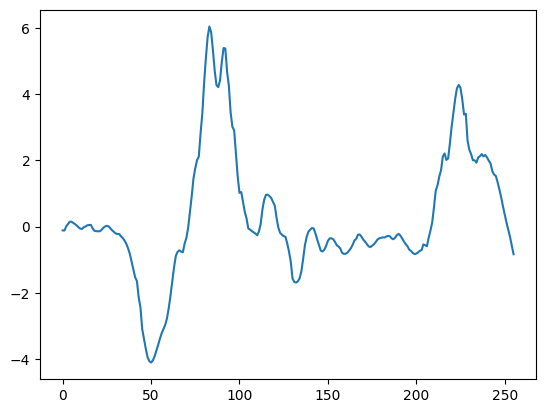

In [24]:
from matplotlib import pyplot as plt

y, x1, x2 = next(iter(train_loader))
print(x1.shape)

plt.plot(x1[0, :, 0])
plt.show()